# Predicting house prices: a regression example

## Load the dataset

In [2]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


## Normalise the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Build the model

In [9]:
from keras import models, layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, 
                           activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer='rmsprop', 
        loss='mse', 
        metrics=['mae']
    )
    return model

## K-fold cross validation

In [11]:
import numpy as np

In [18]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

In [19]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]
        ], axis=0) 
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]
        ], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
all_scores


[2.692249864634901, 3.086893684793227, 2.673373529226473, 2.5872026953366722]

In [21]:
np.mean(all_scores)

2.759929943497818

In [27]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

## Plot the validation scores

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,15)

Text(0, 0.5, 'Validation MAE')

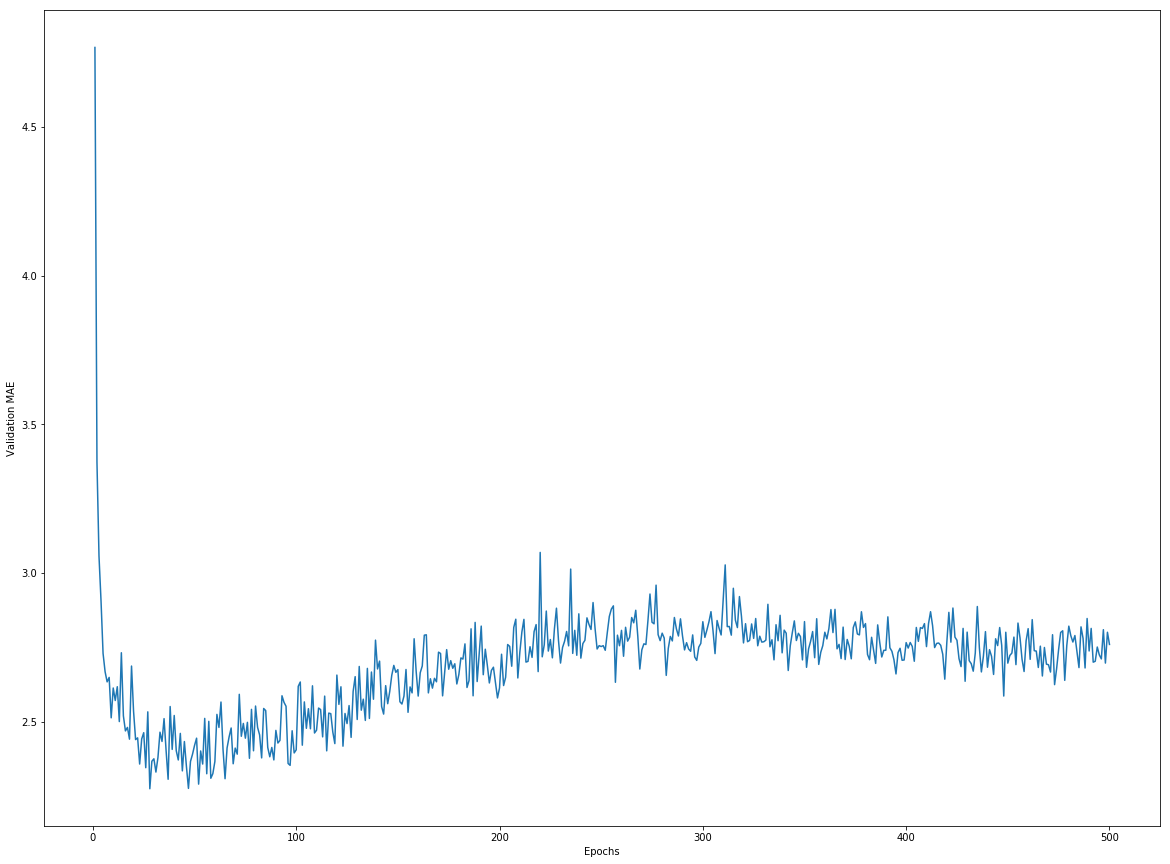

In [32]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

## Plot the validation scores with EMA smoothing

Text(0, 0.5, 'Validation MAE')

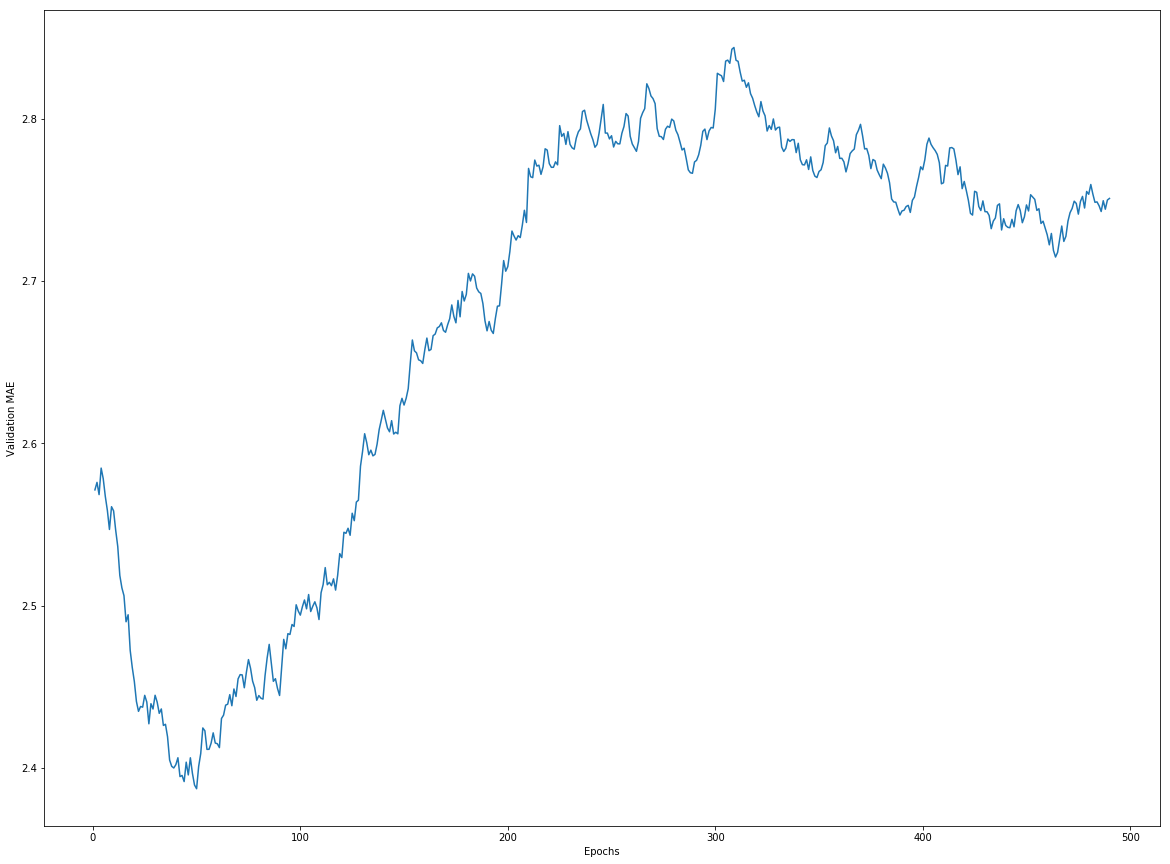

In [38]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')


## Train the fnal model

In [42]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 942us/step - loss: 510.5026 - mean_absolute_error: 20.7265
Epoch 2/80
404/404 [==============================] - 0s 73us/step - loss: 346.4238 - mean_absolute_error: 16.6620
Epoch 3/80
404/404 [==============================] - 0s 77us/step - loss: 180.2253 - mean_absolute_error: 11.2641
Epoch 4/80
404/404 [==============================] - 0s 79us/step - loss: 83.7548 - mean_absolute_error: 7.0376
Epoch 5/80
404/404 [==============================] - 0s 79us/step - loss: 48.8370 - mean_absolute_error: 5.2147
Epoch 6/80
404/404 [==============================] - 0s 76us/step - loss: 35.3460 - mean_absolute_error: 4.3891
Epoch 7/80
404/404 [==============================] - 0s 83us/step - loss: 29.1036 - mean_absolute_error: 3.9081
Epoch 8/80
404/404 [==============================] - 0s 79us/step - loss: 26.0949 - mean_absolute_error: 3.6365
Epoch 9/80
404/404 [==============================] - 0s 79us/step - loss: 23.7132 - mean

404/404 [==============================] - 0s 74us/step - loss: 6.3588 - mean_absolute_error: 1.7926
Epoch 74/80
404/404 [==============================] - 0s 71us/step - loss: 6.2807 - mean_absolute_error: 1.7813
Epoch 75/80
404/404 [==============================] - 0s 74us/step - loss: 6.1220 - mean_absolute_error: 1.7636
Epoch 76/80
404/404 [==============================] - 0s 81us/step - loss: 6.1638 - mean_absolute_error: 1.7726
Epoch 77/80
404/404 [==============================] - 0s 75us/step - loss: 6.0577 - mean_absolute_error: 1.7286
Epoch 78/80
404/404 [==============================] - 0s 75us/step - loss: 6.0652 - mean_absolute_error: 1.7478
Epoch 79/80
404/404 [==============================] - 0s 74us/step - loss: 6.1583 - mean_absolute_error: 1.7144
Epoch 80/80
102/102 [==============================] - 0s 1ms/step


In [43]:
test_mae_score

2.8409756772658405